# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [95]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Statements

In [96]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [97]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [98]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [99]:
print(f'Median_Household_Income_2015: {df_hh_income.shape}')
print(f'Pct_People_Below_Poverty_Level: {df_pct_poverty.shape}')
print(f'Pct_Over_25_Completed_High_School: {df_pct_completed_hs.shape}')
print(f'Share_of_Race_By_City: {df_share_race_city.shape}')
print(f'Deaths_by_Police_US: {df_fatalities.shape}')

Median_Household_Income_2015: (29322, 3)
Pct_People_Below_Poverty_Level: (29329, 3)
Pct_Over_25_Completed_High_School: (29329, 3)
Share_of_Race_By_City: (29268, 7)
Deaths_by_Police_US: (2535, 14)


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [100]:
print(f'Median_Household_Income_2015: {df_hh_income.isna().values.any()}')
print(f'Pct_People_Below_Poverty_Level: {df_pct_poverty.isna().values.any()}')
print(f'Pct_Over_25_Completed_High_School: {df_pct_completed_hs.isna().values.any()}')
print(f'Share_of_Race_By_City: {df_share_race_city.isna().values.any()}')
print(f'Deaths_by_Police_US: {df_fatalities.isna().values.any()}')

Median_Household_Income_2015: True
Pct_People_Below_Poverty_Level: False
Pct_Over_25_Completed_High_School: False
Share_of_Race_By_City: False
Deaths_by_Police_US: True


In [101]:
print(f'Median_Household_Income_2015: {df_hh_income.isna().values.sum()}')
print(f'Deaths_by_Police_US: {df_fatalities.isna().values.sum()}')

Median_Household_Income_2015: 51
Deaths_by_Police_US: 346


In [102]:
df_hh_income.dropna(inplace=True)
df_fatalities.dropna(inplace=True)
print(f'Median_Household_Income_2015: {df_hh_income.isna().values.sum()}')
print(f'Deaths_by_Police_US: {df_fatalities.isna().values.sum()}')

Median_Household_Income_2015: 0
Deaths_by_Police_US: 0


In [103]:
# Data Cleaning to clean '+', '-', '(X)' and ','.
df_hh_income['Median Income'].replace('[-+,(X)]', '', regex=True, inplace=True)
df_hh_income['Median Income'].replace('', '0', inplace=True)
df_hh_income['Median Income'] = df_hh_income['Median Income'].astype('int')

In [104]:
df_pct_poverty.poverty_rate.replace('[-+,(X)]', '', regex=True, inplace=True)
df_pct_poverty.poverty_rate.replace('', '0', inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype('float')

In [105]:
df_pct_completed_hs.percent_completed_hs.replace('[-+,(X)]', '', regex=True, inplace=True)
df_pct_completed_hs.percent_completed_hs.replace('', '0', inplace=True)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype('float')

In [106]:

df_share_race_city.share_white.replace('[-+,(X)]', '', regex=True, inplace=True)
df_share_race_city.share_white.replace('', '0', inplace=True)
df_share_race_city.share_white = df_share_race_city.share_white.astype('float')

df_share_race_city.share_black.replace('[-+,(X)]', '', regex=True, inplace=True)
df_share_race_city.share_black.replace('', '0', inplace=True)
df_share_race_city.share_black = df_share_race_city.share_black.astype('float')

df_share_race_city.share_native_american.replace('[-+,(X)]', '', regex=True, inplace=True)
df_share_race_city.share_native_american.replace('', '0', inplace=True)
df_share_race_city.share_native_american = df_share_race_city.share_native_american.astype('float')

df_share_race_city.share_asian.replace('[-+,(X)]', '', regex=True, inplace=True)
df_share_race_city.share_asian.replace('', '0', inplace=True)
df_share_race_city.share_asian = df_share_race_city.share_asian.astype('float')

df_share_race_city.share_hispanic.replace('[-+,(X)]', '', regex=True, inplace=True)
df_share_race_city.share_hispanic.replace('', '0', inplace=True)
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.astype('float')

In [107]:
df_fatalities.age.replace('[-+,(X)]', '', regex=True, inplace=True)
df_fatalities.age.replace('', '0', inplace=True)
df_fatalities.age = df_fatalities.age.astype('int')

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [108]:
df_poverty = df_pct_poverty.groupby(['Geographic Area'], as_index=False).agg({'poverty_rate': pd.Series.mean}).sort_values('poverty_rate', ascending=False)

In [109]:
g_bar=px.bar(x=df_poverty['Geographic Area'], 
             y=df_poverty.poverty_rate, 
             hover_name=df_poverty.poverty_rate,
             color=df_poverty['Geographic Area'], 
             color_continuous_scale='Aggrnyl',
             title='PPoverty Rate in each US State',
             barmode='group'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='US State', yaxis_title='Poverty Rate', coloraxis_showscale=False)
g_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [110]:
df_completed_hs = df_pct_completed_hs.groupby(['Geographic Area'], as_index=False).agg({'percent_completed_hs': pd.Series.mean}).sort_values('percent_completed_hs', ascending=False)

In [111]:
g_bar=px.bar(x=df_completed_hs['Geographic Area'], 
             y=df_completed_hs.percent_completed_hs, 
             hover_name=df_completed_hs.percent_completed_hs,
             color=df_completed_hs['Geographic Area'], 
             color_continuous_scale='Aggrnyl',
             title='High School Graduation Rate by US State',
             barmode='group'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='US State', yaxis_title='Graduation Rate', coloraxis_showscale=False)
g_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [112]:
df_poverty_by_state = df_poverty.sort_values('Geographic Area')

In [113]:
df_completed_hs_by_state = df_completed_hs.sort_values('Geographic Area')

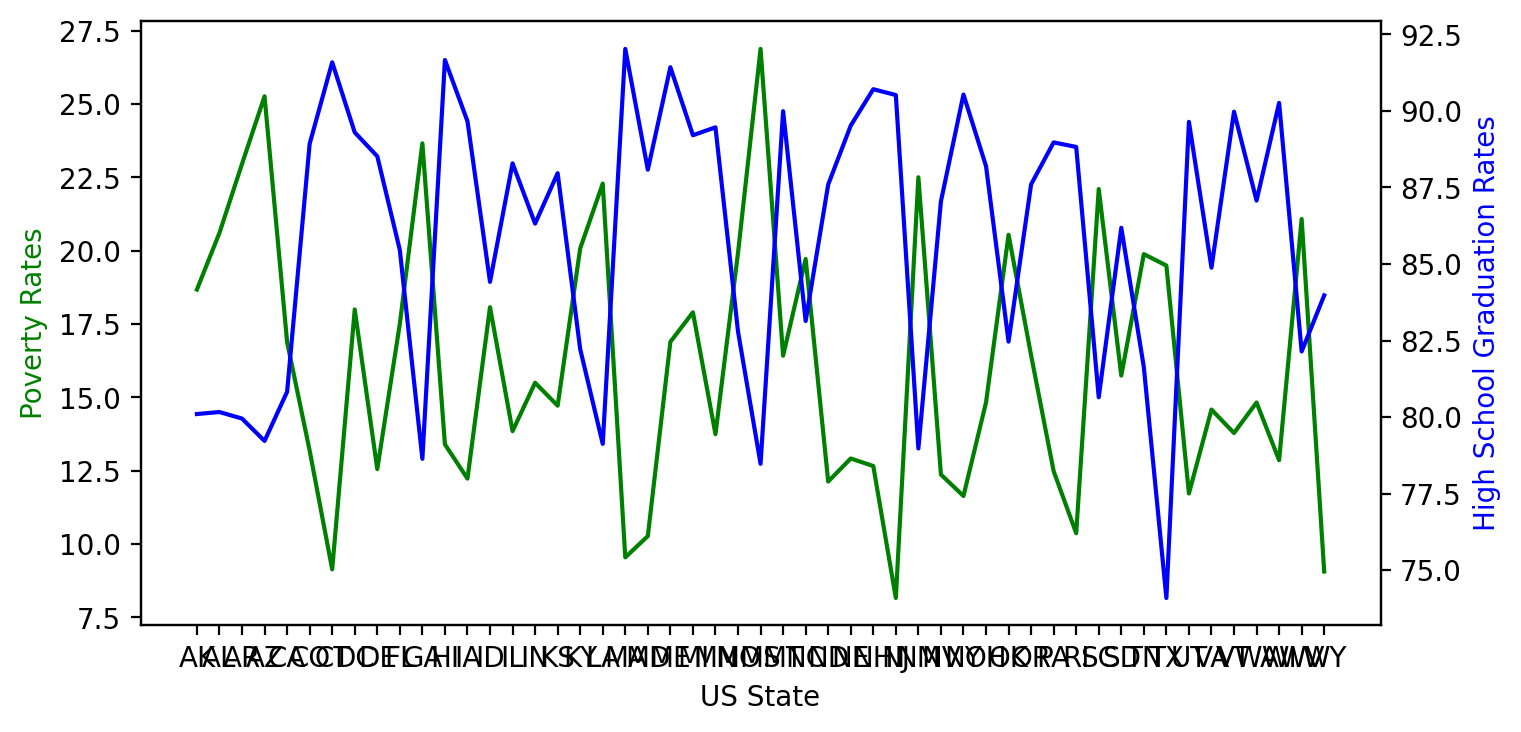

In [114]:
plt.figure(figsize=(8, 4), dpi=200)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_poverty_by_state['Geographic Area'], df_poverty_by_state.poverty_rate, color='g')
ax2.plot(df_completed_hs_by_state['Geographic Area'], df_completed_hs_by_state.percent_completed_hs, 'b')
ax1.set_xlabel('US State')
ax1.set_ylabel('Poverty Rates', color='green')
ax2.set_ylabel('High School Graduation Rates', color='blue')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [115]:
df_by_state = df_completed_hs_by_state.merge(df_poverty_by_state, how='inner', on='Geographic Area')

In [116]:
df_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       51 non-null     object 
 1   percent_completed_hs  51 non-null     float64
 2   poverty_rate          51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


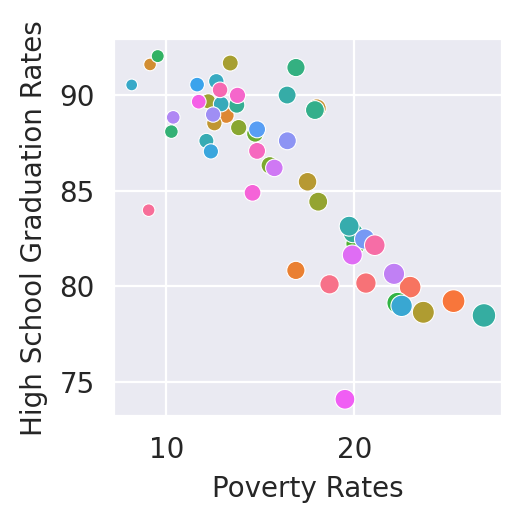

In [117]:
plt.figure(figsize=(2.5,2.5), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=df_by_state, x='poverty_rate', y='percent_completed_hs', hue='Geographic Area', size='poverty_rate', legend=False)
  ax.set(ylabel='High School Graduation Rates', xlabel='Poverty Rates')
  # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

<Figure size 600x600 with 0 Axes>

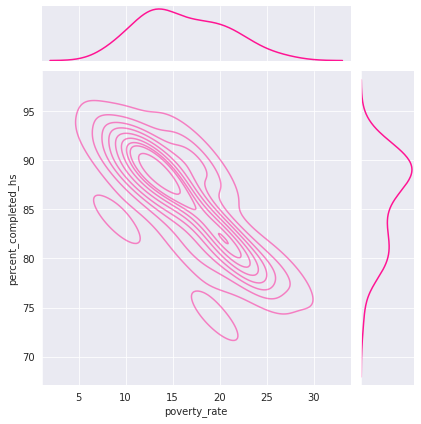

In [118]:
plt.figure(figsize=(3,3), dpi=200)
with sns.axes_style('darkgrid'):
  sns.jointplot(data=df_by_state, x='poverty_rate', y='percent_completed_hs', kind='kde', color='deeppink', joint_kws={'alpha':0.5})
  
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

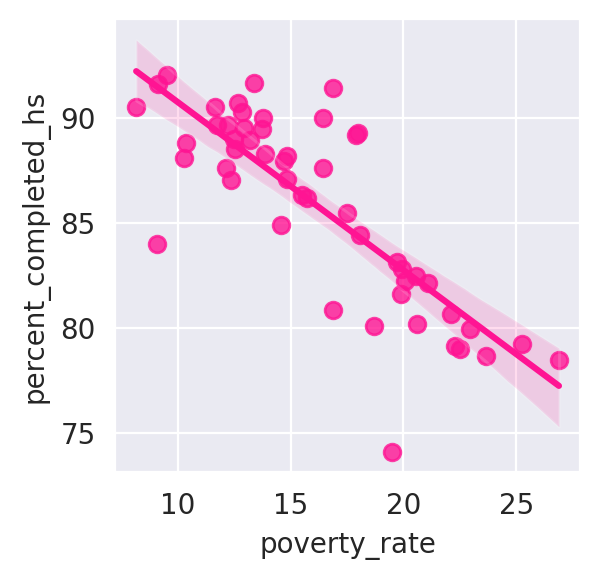

In [119]:
plt.figure(figsize=(3,3), dpi=200)
with sns.axes_style('darkgrid'):
  sns.regplot(data=df_by_state, x='poverty_rate', y='percent_completed_hs', label='Geographic Area', color='deeppink')
  
plt.show()

<Figure size 600x600 with 0 Axes>

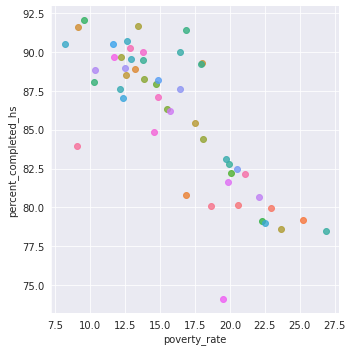

In [120]:
plt.figure(figsize=(3,3), dpi=200)
with sns.axes_style('darkgrid'):
  sns.lmplot(data=df_by_state, x='poverty_rate', y='percent_completed_hs', hue='Geographic Area', legend=False)
  
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [121]:
df_share_race_by_state = df_share_race_city.groupby(['Geographic area'], as_index=False).agg(
    {'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean,
     'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})

In [122]:
# Convert df format from wide to long.
df_race = pd.wide_to_long(df_share_race_by_state, ['share'], sep='_', suffix='(white|black|hispanic|native_american|asian)', i='Geographic area', j="race")
# Make 'Geographic area' as column.
df_race.reset_index(inplace=True)
df_race.head(5)

,Geographic area,race,share
0,AK,white,45.26
1,AL,white,72.51
2,AR,white,78.45
3,AZ,white,59.93
4,CA,white,71.54


In [123]:
g_bar=px.bar(df_race, 'Geographic area', 'share', 
             hover_name='race', 
             color='race', 
             color_continuous_scale='Aggrnyl',
             title='Racial Makeup by US State',
             barmode='relative'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='US State', yaxis_title='Racial Makeup (%)', coloraxis_showscale=False)
g_bar.show()



# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [124]:
df_death = df_fatalities.groupby('race', as_index=False).agg({'id': pd.Series.count})

In [125]:
fig = px.pie(df_death, values='id', names='race', hover_name='race', hole=0.4, title='People Killed by Race')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [126]:
df_by_sex = df_fatalities.groupby('gender', as_index=False).agg({'id': pd.Series.count})

In [127]:
g_bar=px.bar(df_by_sex, 'gender', 'id', 
             color='gender', 
             color_continuous_scale='Aggrnyl',
             title='Total Number of Deaths of Men and Women',
             barmode='group'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='Gender', yaxis_title='Number of Deaths', coloraxis_showscale=False)
g_bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [128]:
df_by_age_manner = df_fatalities.groupby(['manner_of_death', 'gender', 'age'], as_index=False).count()

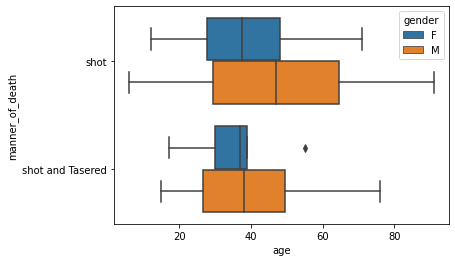

In [129]:
sns.boxplot(data=df_by_age_manner, x='age', y='manner_of_death', hue='gender')

# box.update_layout(xaxis_title='Manner of Death',
#                   yaxis_title='Number of Deaths')
# box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [130]:
unarmed = df_fatalities[df_fatalities['armed'] == 'unarmed'].count()[0]
total_deaths = df_fatalities['armed'].count()
armed = round((total_deaths-unarmed)/total_deaths * 100, 2)
print(f'{armed}% killed by police were unarmed.')

92.68% killed by police were unarmed.


In [131]:
df_armed = df_fatalities.groupby(['armed'], as_index=False).agg({'id': pd.Series.count})

In [132]:
g_bar=px.bar(df_armed, 'armed', 'id', 
             color='armed', 
             color_continuous_scale='Aggrnyl',
             title='Total Number of Deaths vs Types of Weapon Carrying',
             barmode='group'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='Types of Weapon Carrying', yaxis_title='Number of Deaths', coloraxis_showscale=False)
g_bar.show()

# How Old Were the People Killed?

In [133]:
g_bar=px.bar(df_by_age_manner, 'age', 'id', 
             color='age', 
             color_continuous_scale='Aggrnyl',
             title='Total Number of Deaths by Age',
             barmode='group'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='Age', yaxis_title='Number of Deaths', coloraxis_showscale=False)
g_bar.show()


Work out what percentage of people killed were under 25 years old.  

In [134]:
under_25 = df_fatalities[df_fatalities['age'] < 25].count()[0]
under_25_pct = round(under_25/total_deaths * 100, 2)
print(f'{under_25_pct}% killed were under 25.')

18.72% killed were under 25.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

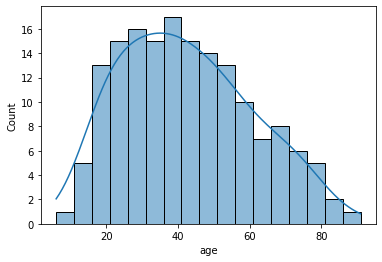

In [245]:
sns.histplot(data=df_by_age_manner, x="age", binwidth=5, kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [136]:
df_death_by_race = df_fatalities.groupby(['age', 'race'], as_index=False).agg({'id': pd.Series.count})

[Text(0.5, 1.0, 'Deaths by Race and Age')]

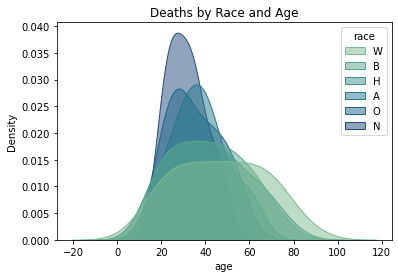

In [137]:
sns.kdeplot(data=df_death_by_race, x='age', hue='race', 
                   fill=True, common_norm=False, palette="crest", alpha=.5,).set(title='Deaths by Race and Age')

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [138]:
g_bar=px.bar(df_death_by_race, 'race', 'id', 
             color='race', 
             color_continuous_scale='Aggrnyl',
             title='Total Number of Deaths by Race',
             barmode='group'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='Race', yaxis_title='Number of Deaths', coloraxis_showscale=False)
g_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [139]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False


In [140]:
df_by_illness = df_fatalities.groupby('signs_of_mental_illness', as_index=False).agg({'id': pd.Series.count})

In [141]:
with_illness = df_by_illness[df_by_illness['signs_of_mental_illness'] == True]['id'].values[0]
with_illness_pct = round(with_illness/total_deaths * 100, 2)
print(f'{with_illness_pct}% killed have been diagnosed with a mental illness.')

25.42% killed have been diagnosed with a mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [166]:
top_10_cities = df_fatalities.groupby(['city', 'state'], as_index=False).agg({'id': pd.Series.count}).sort_values('id', ascending=False).head(10)

In [168]:
g_bar=px.bar(top_10_cities, 'city', 'id', 
             color='city', 
             color_continuous_scale='Aggrnyl',
             title='Top 10 Cities With Most Police Killings',
             barmode='group'
             )
g_bar.update_traces(width=1)
g_bar.update_layout(xaxis_title='City', yaxis_title='Number of Deaths', coloraxis_showscale=False)
g_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [191]:
df_share_race_city.head(2)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10


In [203]:
top_10_by_race = []
for n in range(len(top_10_cities)):
  city = top_10_cities.iloc[n].city
  state = top_10_cities.iloc[n].state
  regex=f'^{city}.*'
  top_10_by_race.append(df_share_race_city[(df_share_race_city['Geographic area'] == state) & (df_share_race_city.City.str.match(regex))].values[0])


In [205]:
top_10_by_race = pd.DataFrame(top_10_by_race, columns = ['State', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'])

In [207]:
top_10_by_race

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
1,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
2,TX,Houston city,50.50,23.70,0.70,6.00,43.80
3,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
4,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50
5,TX,Austin city,68.30,8.10,0.90,6.30,35.10
6,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20
7,OH,Columbus city,61.50,28.00,0.30,4.10,5.60
8,IN,Indianapolis city,62.00,27.30,0.30,2.10,9.40
9,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [209]:
df_by_state = df_fatalities.groupby('state', as_index=False).agg({'id': pd.Series.count})

In [210]:
df_by_state.head(5)

,state,id
0,AK,14
1,AL,45
2,AR,20
3,AZ,105
4,CA,366


In [215]:
fig = px.choropleth(df_by_state, locations='state', locationmode='USA-states',
                    color='id', color_continuous_scale="sunset",
                    range_color=(0, 12),labels={'id':'Number of Deaths'},
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [216]:
df_fatalities.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


In [233]:
df_death_by_date = df_fatalities.groupby('date', as_index=False).agg({'id':pd.Series.count})

In [228]:
from datetime import datetime

In [234]:
df_death_by_date["date"] = pd.to_datetime(df_death_by_date["date"])

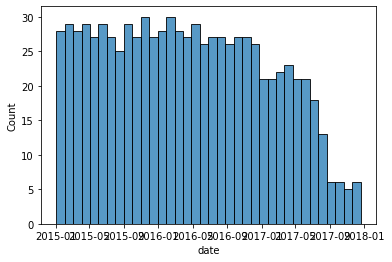

In [247]:
sns.histplot(data=df_death_by_date, x="date", binwidth=30)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).